In [ ]:
# LAB 1 - Working with data and statistics

## Task 1: Get some insights

In [112]:
import math
import statistics

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import median_abs_deviation

%matplotlib inline

The list of grades is as follows

In [113]:
grades = [8, 6, 1, 7, 8, 9, 8, 7, 10, 7, 6, 9, 7]

Define functions for calculating the minimum, maximum, sum, mean, variance, standard deviation, median and median absolute deviance

First let's define the functions for calculating the minimum, maximum and range of an array:

In [114]:
def my_min(array):
    low = None
    for item in array:
        if low is None or item < low:
            low = item
    return low

def my_max(array):
    high = None
    for item in array:
        if high is None or item > high:
            high = item
    return high

def my_range(array):
    return my_max(array) - my_min(array)


Now let's define the functions calculating (the sum and) the mean of the array: 

In [115]:
def my_sum(array):
    sum_ = 0
    for item in array:
        sum_ += item
    return sum_

def my_mean(array):
    return my_sum(array) / len(array)

Now let's use these functions on the grades array and validate the results:

In [116]:
min_value = my_min(grades)
assert(min_value == min(grades))
print(f'The minimum grade is: {min_value}')

max_value = my_max(grades)
assert(max_value == max(grades))
print(f'The maximum grade is: {max_value}')

mean_value = my_mean(grades)
assert(mean_value == statistics.mean(grades))
print(f'The mean grade is: {mean_value:.2f}')

spread_grades = my_range(grades)
assert(spread_grades == (max(grades) - min(grades)))
print(f'The spread (range) of the grades is: {spread_grades}')

The minimum grade is: 1
The maximum grade is: 10
The mean grade is: 7.15
The spread (range) of the grades is: 9


The minimum and the maximum are the lowest and highest elements occurring in the sample, respectively. The range is the difference between these two values, while the (arithmetic) mean is the sum of the items in the sample divided by the size of the sample, i.e. the average of the items in the sample. The latter serves as an estimate of the mean of the whole population.

## Task 2: Some more insights
Let's continue with calculating the variance and the standard deviation

In [117]:
def my_variance(array):
    mean = my_mean(array)
    numerator = my_sum((item - mean)**2 for item in array)
    return numerator / (len(array) - 1)

def my_standard_deviation(array):
    return math.sqrt(my_variance(array))

Now apply these to the array above

In [118]:
variance = my_variance(grades)
assert (variance == statistics.variance(grades))
print(f'The sample variance of the grades is: {variance:.2f}')

standard_deviation = my_standard_deviation(grades)
assert(standard_deviation == statistics.stdev(grades))
print(
    f'The sample standard deviation of the grades is: '
    f'{standard_deviation:.2f}'
)

The sample variance of the grades is: 4.81
The sample standard deviation of the grades is: 2.19


The sample variance and standard deviation are an estimate of the population variance and standard deviation, which can be calculated in slightly different ways. The values above are the _unbiased_ sample variance and stdev values, where the denominator equals to the size of the sample *minus 1*. If we want to get the _biased_ values returned by NumPy, we have to define the functions as follows:

In [119]:
def my_biased_variance(array):
    mean = my_mean(array)
    numerator = my_sum((item - mean)**2 for item in array)
    return numerator / (len(array))

def my_biased_standard_deviation(array):
    return math.sqrt(my_biased_variance(array))


biased_variance = my_biased_variance(grades)
assert (biased_variance == np.var(grades))
print(f'The biased sample variance of the grades is: {biased_variance:.2f}')

biased_standard_deviation = my_biased_standard_deviation(grades)
assert(biased_standard_deviation == np.std(grades))
print(
    f'The biased sample standard deviation of the grades is: '
    f'{biased_standard_deviation:.2f}'
)

The biased sample variance of the grades is: 4.44
The biased sample standard deviation of the grades is: 2.11


Both values measure the spread of the data. The variance itself is the mean of the squared deviations of each item from the mean, while the standard deviation is the square root of the variance.

## Task 3: Median and median absolute deviation
First, let's define the functions calculating these two properties:

In [120]:
def my_median(array):
    sorted_array = sorted(array)
    length = len(array)
    if length % 2:  # odd
        indices = [(length - 1) // 2]
    else:  # even
        indices = [length//2 - 1, length // 2]

    return my_mean([sorted_array[i] for i in indices])

def my_median_absolute_deviation(array):
    median = my_median(array)
    return my_median([abs(item - median) for item in array])

Now apply them to the grades array above

In [121]:
median_grade = my_median(grades)
assert(median_grade == statistics.median(grades))
print(f'The median of the grades is {median_grade}')

mad_grade = my_median_absolute_deviation(grades)
grades_df = pd.DataFrame(grades, columns=['Grades'])
assert(
    mad_grade == grades_df[['Grades']].apply(median_abs_deviation).Grades
)
print(f'The median absolute deviation of the grades is {mad_grade}')

The median of the grades is 7.0
The median absolute deviation of the grades is 1.0


## Task 4: Let's visualize the data!

The most frequent grade is: 7


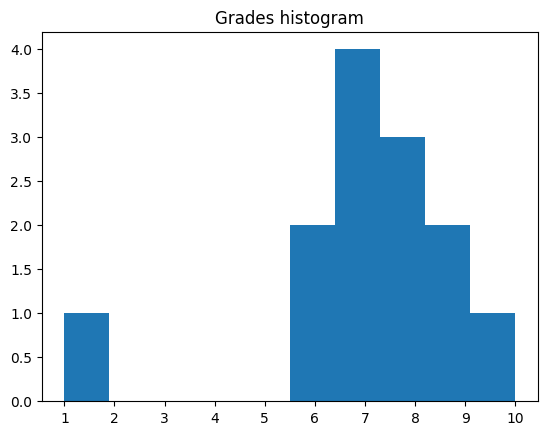

In [122]:
plt.hist(grades)
plt.title('Grades histogram')
plt.xticks(np.arange(min_value, max_value + 1, 1))

mode_grade = statistics.mode(grades)
print(f'The most frequent grade is: {mode_grade}')

The value 1 is far from the rest and thus appears to be an outlier.

## Task 5: Apply to a real dataset
First, let's fetch the data from the csv file